In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from fastai import *
from fastai.vision import *

In [3]:
import os
print(os.listdir("./pizzadataset"))


['.DS_Store', 'test', 'models', 'train']


In [4]:
path = Path('./pizzadataset')
path

PosixPath('pizzadataset')

In [5]:
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms=get_transforms(), size=299, bs=32, num_workers=0).normalize(imagenet_stats)

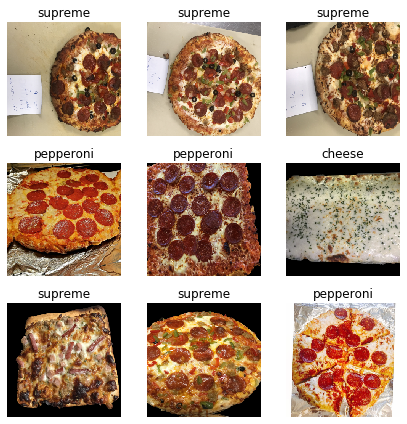

In [6]:
data.show_batch(rows=3, figsize=(6,6))

In [7]:
data

ImageDataBunch;

Train: LabelList (112 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
cheese,cheese,cheese,cheese,cheese
Path: pizzadataset;

Valid: LabelList (28 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
supreme,pepperoni,cheese,cheese,pepperoni
Path: pizzadataset;

Test: None

In [8]:
data.classes

['cheese', 'pepperoni', 'supreme']

In [9]:
learn = create_cnn(data, models.resnet34, metrics = [error_rate, accuracy])

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.870366,0.975486,0.357143,0.642857,02:04
1,1.384353,0.821517,0.214286,0.785714,02:00
2,1.099417,0.455724,0.107143,0.892857,02:06
3,0.976928,0.358363,0.107143,0.892857,02:05


In [11]:
learn.save("stage-topping")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


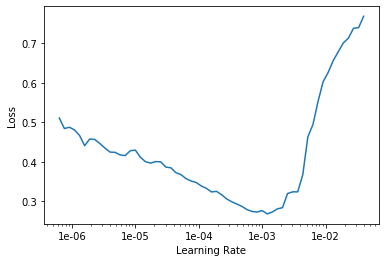

In [12]:
#Initiating refit and checking LR
learn.load("stage-topping")
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
#The lowest loss is at 1e-04 and loss increases from after 1e-03. Refitting by modulating LR
learn.fit_one_cycle(2,max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.174335,0.486706,0.107143,0.892857,02:24
1,0.110425,0.376454,0.107143,0.892857,02:15


In [16]:
#Saving the model with accuracy %
learn.save('stage-topping-1')

In [17]:
learn.export("stage_topping.pkl")

In [18]:
#Uploaded a separate dataset for testing each of the above classes.
PRED_PATH = "./testimages"
img_91 = open_image(f'{PRED_PATH}/91.jpg')
img_92 = open_image(f'{PRED_PATH}/92.jpg')
img_117 = open_image(f'{PRED_PATH}/117.jpg')
img_118 = open_image(f'{PRED_PATH}/118.jpg')

In [20]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_92)
pred_class

(Category tensor(1), tensor(1), tensor([1.7287e-04, 9.9983e-01, 5.7594e-08]))

In [21]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_117)
pred_class

(Category tensor(2), tensor(2), tensor([3.7728e-05, 1.6641e-06, 9.9996e-01]))

In [22]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_118)
pred_class

(Category tensor(2), tensor(2), tensor([1.5848e-09, 1.0609e-11, 1.0000e+00]))

In [23]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_91)
pred_class

(Category tensor(1), tensor(1), tensor([1.0093e-03, 9.9882e-01, 1.7135e-04]))

In [25]:
pepperoni = open_image(f'{PRED_PATH}/Pepperoni.jpg')

In [26]:
learn.load('stage-topping-1')
pred_class = learn.predict(pepperoni)
pred_class

(Category tensor(1), tensor(1), tensor([7.9079e-05, 9.9905e-01, 8.6645e-04]))

In [28]:
salad = open_image(f'{PRED_PATH}/salad.jpg')

In [29]:
learn.load('stage-topping-1')
pred_class = learn.predict(salad)
pred_class

(Category tensor(1), tensor(1), tensor([0.0401, 0.9090, 0.0510]))

In [30]:
plate = open_image(f'{PRED_PATH}/plate.jpg')
learn.load('stage-1')
pred_class = learn.predict(plate)
pred_class


(Category tensor(2), tensor(2), tensor([0.3144, 0.0032, 0.6823]))

In [31]:
print(pred_class)

(Category tensor(2), tensor(2), tensor([0.3144, 0.0032, 0.6823]))


In [65]:
pred_idx

tensor(2)

In [32]:
learn.data.classes

['cheese', 'pepperoni', 'supreme']